# Bike Sharing Neural Network Project

## In this notebook:
- About the dataset
    - Background
    - Data Set
    - Files
    - Dataset characteristics
    - License
    - Contact
- Project
    - Libraries
    - Part 1: Bike rental on daily basis
        - Loading data
        - Data analysis
        - Visualisation
        - Correlation heatmap
        - Molding data
        - Splitting data
        - Normalising data
        - Building the ANN model
        - Model evaluation
    - Part 2: Bike rental on hourly basis
        - Loading data
        - Data analysis
        - Visualisation
        - Correlation heatmap
        - Molding data
        - Splitting data
        - Normalising data
        - Building the ANN model
        - Model evaluation
    - Conclusions
        


# About the dataset


### Background


Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

### Data Set
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

### Files

* Readme.txt
* hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
* day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

### Dataset characteristics
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### License
Use of this dataset in publications must be cited to the following publication:

[Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.](http://dx.doi.org/10.1007/s13748-013-0040-3)


### Contact
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)

---

# Project
This project aims to create ANN model for predicting number of rented bikes daily and hourly. To do this, all parameters found in the dataset will be analyzed and visualized. All steps are listed at the top of the document.

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers

%matplotlib inline

## Part 1: Bike rental on daily basis
### Loading data

In [2]:
df2 = pd.read_csv("./data/day.csv")

In [3]:
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Data analysis

In [4]:
df2.isnull().values.any()

False

In [5]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


There are no missing values in this dataset. In table above we can see many useful metrics of this dataset. Before molding data and building neural network it is important to take a loot at data and visualise it. Plots beneath have been created to give us better understanding what we're dealing with.

### Visualisation

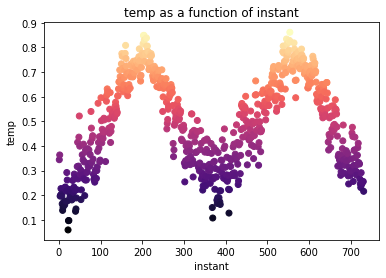

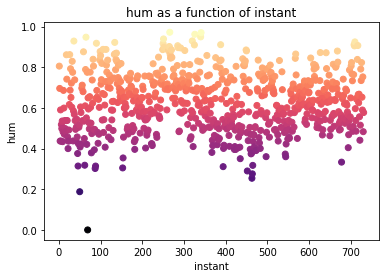

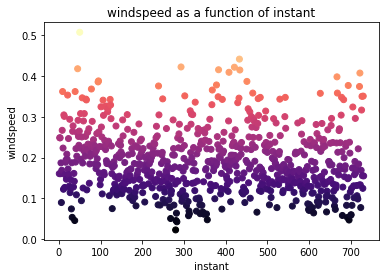

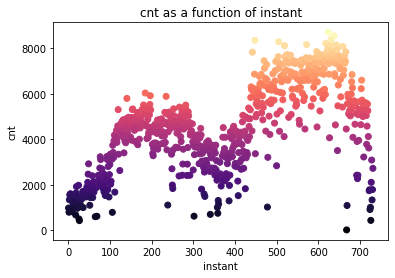

In [6]:
columns_combinations = [["instant", "temp"], ["instant", "hum"], ["instant", "windspeed"], ["instant", "cnt"], ]

for combination in columns_combinations:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df2[combination[0]],df2[combination[1]], c=df2[combination[1]], cmap='magma')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.set_title("{} as a function of {}".format(combination[1], combination[0]))

    plt.show()

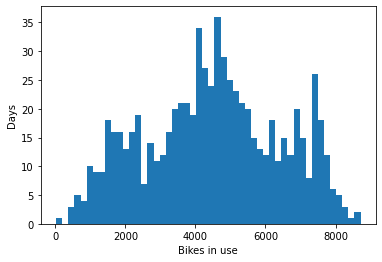

Average number of bikes in use is 4504.3488372093025 
Median of number of bikes in use is 4548.0


In [7]:
plt.hist(df2['cnt'], bins=50)
plt.ylabel('Days')
plt.xlabel('Bikes in use')
plt.show()
print("Average number of bikes in use is {} \nMedian of number of bikes in use is".format(df2['cnt'].mean()), df2['cnt'].median())

[Text(0, 0.5, 'Temperature'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Scatter plot of relation between temperature and rented bikes')]

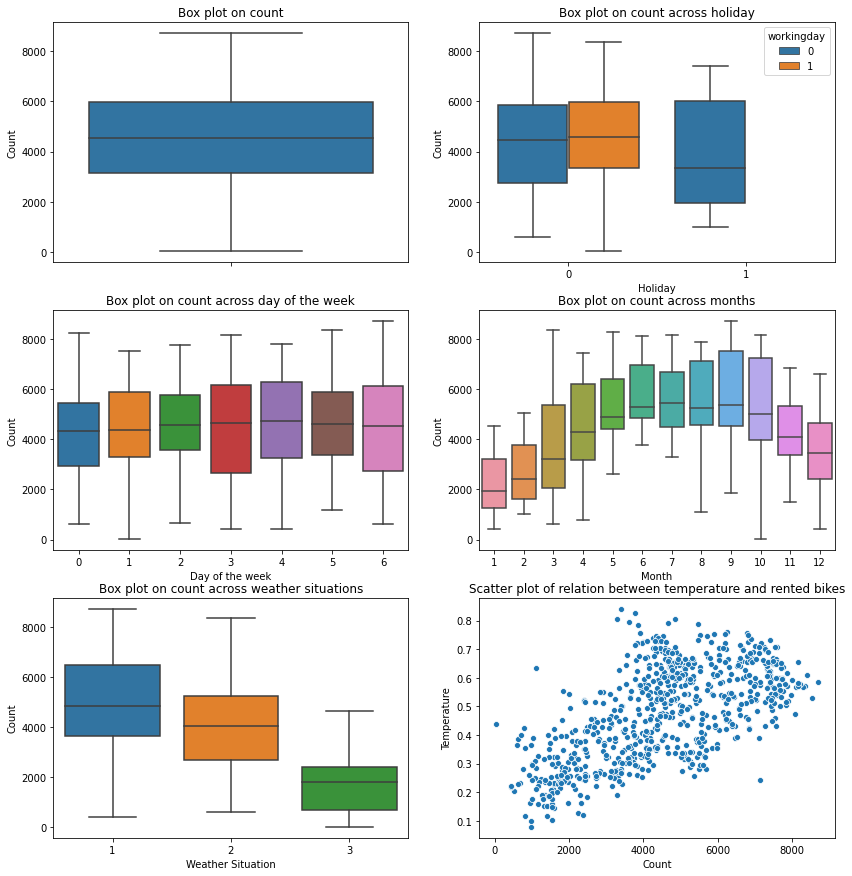

In [8]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(14, 15)

sns.boxplot(x="cnt", data=df2, orient="v", ax=axes[0][0])
sns.boxplot(x="holiday", y="cnt", hue="workingday", data=df2, orient="v", ax=axes[0][1])
sns.boxplot(x="weekday", y="cnt", data=df2, orient="v", ax=axes[1][0])
sns.boxplot(x="mnth", y="cnt", data=df2, orient="v", ax=axes[1][1])
sns.boxplot(x="weathersit", y="cnt", data=df2, orient="v", ax=axes[2][0])
sns.scatterplot(x="cnt", y="atemp", data=df2, ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box plot on count")
axes[0][1].set(xlabel='Holiday', ylabel='Count',title="Box plot on count across holiday")
axes[1][0].set(xlabel='Day of the week', ylabel='Count',title="Box plot on count across day of the week")
axes[1][1].set(xlabel='Month', ylabel='Count',title="Box plot on count across months")
axes[2][0].set(xlabel='Weather Situation', ylabel='Count',title="Box plot on count across weather situations")
axes[2][1].set(xlabel="Count", ylabel='Temperature',title="Scatter plot of relation between temperature and rented bikes")

**Interpretation:** We can observe that over time popularity of bike rental grows. There is significant increase between first and second year. On "Box plot on count across holiday" is visible that people rent bikes less during holidays. It would make sense. A lot of people use bikes to get to work. Day of the week has not big significance, unlike weather conditions and temperature.

>**Legend for "Box plot on count across weather situations"**<br/>
>* 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br/>
>* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br/>
>* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

Scatter plot shows relation between temperature and number of rented bikes. Pattern is visible but it is not very strong and clear.

### Correlation heatmap

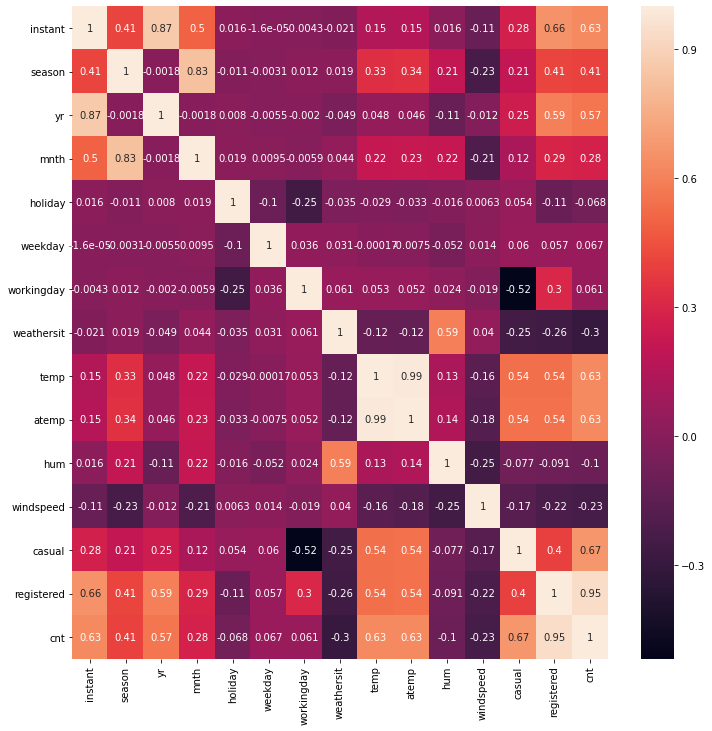

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(),annot=True) # df2.corr() makes a correlation matrix, sns.heatmap creates heatmap of values
plt.show()

### Molding data
We can see very strong correlation between "temp" and "atemp" attributes (0.99). It's first attribute we'll drop. Another strong correlation is between "month" and "season" (0.83). "Cnt" is what we care about. Since it is sum of "casual" and "registered" these two will be taken off too. I have chosen "instant" to be better representation of time than "yr" due to its continueness.

In [10]:
del df2["season"]
del df2["yr"]
del df2["casual"]
del df2["registered"]
del df2["temp"]

### Splitting data

In [11]:
feature_col_names = ['instant', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed']
predicted_class_names = ["cnt"]

X2 = df2[feature_col_names].values 
y2 = df2[predicted_class_names].values 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=40)

### Normalising data

In [13]:
scaler = MinMaxScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

### Building the ANN model

In [14]:
model2 = Sequential()

model2.add(Dense(80, activation="relu"))
model2.add(Dense(50, activation="tanh"))
model2.add(Dense(60, activation="tanh"))
model2.add(Dense(12, activation="softmax"))
model2.add(Dense(18, activation="tanh"))
model2.add(Dense(28, activation="softmax"))
model2.add(Dense(12, activation="relu"))
model2.add(Dense(50, activation="relu"))
model2.add(Dense(26, activation="relu"))
model2.add(Dense(60, activation="relu"))
model2.add(Dense(22, activation="relu"))
model2.add(Dense(30, activation="relu"))
model2.add(Dense(36, activation="relu"))
model2.add(Dense(34, activation="relu"))
model2.add(Dense(36, activation="relu"))
model2.add(Dense(46, activation="relu"))
model2.add(Dense(50, activation="relu"))
model2.add(Dense(24, activation="relu"))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(8, activation="relu"))

model2.add(Dense(1, activation="relu"))

model2.compile(loss="mse", optimizer="adam")

In [15]:
model2.fit(x=X2_train, y=y2_train, epochs=200, validation_data=(X2_test, y2_test),
          batch_size=64, verbose=0)

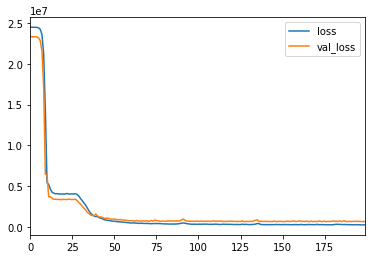

In [16]:
losses = pd.DataFrame(model2.history.history)
losses.plot()

### Model evaluation

In [19]:
predictions2 = model2.predict(X2_test)
print("Mean Absolute Error:         {0:0.2f}".format(mean_absolute_error(y2_test,predictions2)))
print("Mean Squared Error:          {0:0.2f}".format((mean_squared_error(y2_test,predictions2))))
print("Explained Variance Score:    {0:0.2f}%".format(explained_variance_score(y2_test,predictions2)*100))

Mean Absolute Error:         559.57
Mean Squared Error:          632479.24
Explained Variance Score:    81.13%


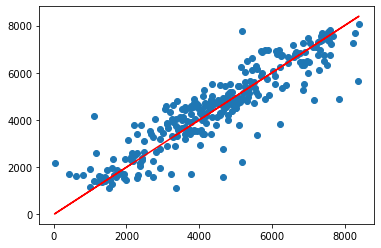

In [20]:
# Our predictions
plt.scatter(y2_test,predictions2)

# Perfect predictions
plt.plot(y2_test,y2_test,'r')

# Sigmoid

from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    
    model.add(Dense(80, activation="relu"))

    model.add(Dense(1, activation="relu"))

    model.compile(loss="mse", optimizer="adam", metrics=['mse'])
    return model

tuner = RandomSearch(build_model,
                    objective='mse',
                    max_trials=1,
                    executions_per_trial=3)
tuner.search(x=X_train, y=y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=0)
tuner.get_best_hyperparameters()[0].values
tuner.results_summary()

## Part 2: Bike rental on hourly basis
### Loading data

In [21]:
df = pd.read_csv("./data/hour.csv")

In [22]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Data analysis

In [23]:
df.isnull().values.any()

False

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


### Visualisation

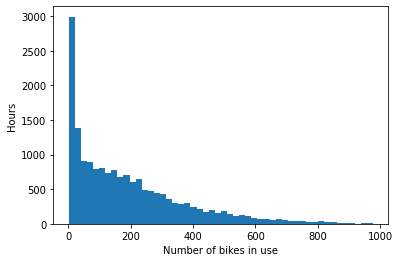

Average number of bikes in use per hour is 189.46308763450142 
Median of number of bikes in use per hour is 142.0


In [26]:
plt.hist(df['cnt'], bins=50)
plt.ylabel('Hours')
plt.xlabel('Number of bikes in use')
plt.show()
print("Average number of bikes in use per hour is {} \nMedian of number of bikes in use per hour is".format(df['cnt'].mean()), df['cnt'].median())

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weather Situation'),
 Text(0.5, 1.0, 'Box plot on count across weather situations')]

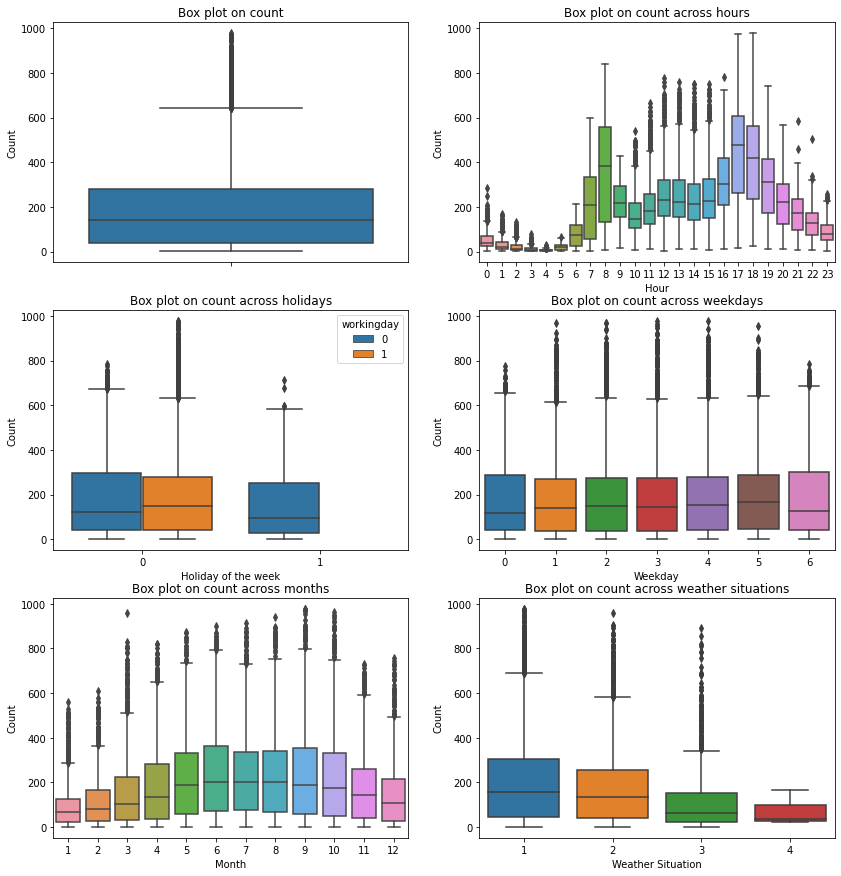

In [25]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(14, 15)

sns.boxplot(x="cnt", data=df, orient="v", ax=axes[0][0])
sns.boxplot(x="hr", y="cnt", data=df, orient="v", ax=axes[0][1])
sns.boxplot(x="holiday", y="cnt", hue="workingday", data=df, orient="v", ax=axes[1][0])
sns.boxplot(x="weekday", y="cnt", data=df, orient="v", ax=axes[1][1])
sns.boxplot(x="mnth", y="cnt", data=df, ax=axes[2][0])
sns.boxplot(x="weathersit", y="cnt", data=df, orient="v", ax=axes[2][1])


axes[0][0].set(ylabel='Count',title="Box plot on count")
axes[0][1].set(xlabel='Hour', ylabel='Count',title="Box plot on count across hours")
axes[1][0].set(xlabel='Holiday of the week', ylabel='Count',title="Box plot on count across holidays")
axes[1][1].set(xlabel='Weekday', ylabel='Count',title="Box plot on count across weekdays")
axes[2][0].set(xlabel='Month', ylabel='Count',title="Box plot on count across months")
axes[2][1].set(xlabel='Weather Situation', ylabel='Count',title="Box plot on count across weather situations")

**Interpretation:** Data on hourly basis has more outliers. "Box plot on count across hours" shows that people use bikes around 8 AM and 5PM, confirmid theory that big part of people renting bikes are using them to commute to work.

### Correlation heatmap

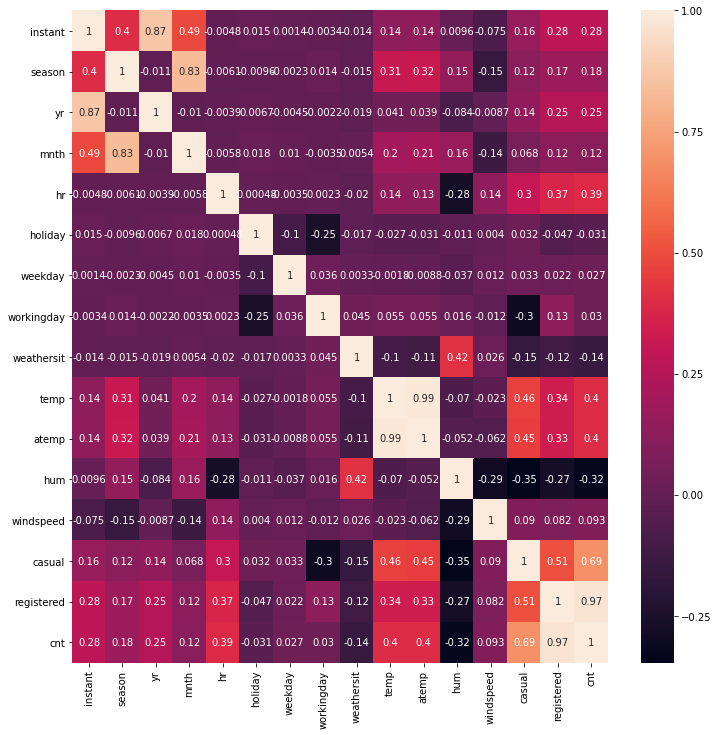

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Molding data

In [28]:
del df["season"]
del df["yr"]
del df["casual"]
del df["registered"]
del df["temp"]

In [29]:
feature_col_names = ['instant', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed']
predicted_class_names = ["cnt"]

X = df[feature_col_names].values     # predictor feature columns 
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

In [30]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building the ANN model

In [31]:
model = Sequential()

model.add(Dense(80, activation="relu"))
model.add(Dense(50, activation="tanh"))
model.add(Dense(60, activation="tanh"))
model.add(Dense(12, activation="softmax"))
model.add(Dense(18, activation="tanh"))
model.add(Dense(28, activation="softmax"))
model.add(Dense(12, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(26, activation="relu"))
model.add(Dense(60, activation="relu"))
model.add(Dense(22, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(36, activation="relu"))
model.add(Dense(34, activation="relu"))
model.add(Dense(36, activation="relu"))
model.add(Dense(46, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))

model.add(Dense(1, activation="relu"))

model.compile(loss="mse", optimizer="adam")

In [32]:
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_test, y_test),
          batch_size=64, verbose=0)

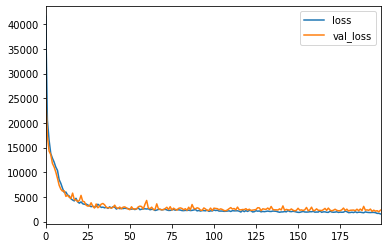

In [33]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Model evaluation

In [34]:
predictions = model.predict(X_test)
print("Mean Absolute Error:         {0:0.2f}".format(mean_absolute_error(y_test,predictions)))
print("Mean Squared Error:          {0:0.2f}".format(mean_squared_error(y_test,predictions)))
print("Explained Variance Score:    {0:0.2f}%".format(explained_variance_score(y_test,predictions)*100))

Mean Absolute Error:         31.94
Mean Squared Error:          2318.89
Explained Variance Score:    93.61%


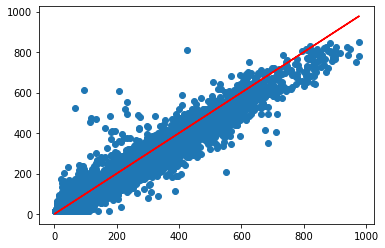

In [35]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

# Conclusion
In this project we can observe many important factors of number of rented bikes. Thanks to visualisations these factors are shown clearly. Average daily use of bikes is 4500, with minimum of 22 and maximum 8714. People are more likely to rent bikes during working days, in the morning (around 8 AM) and in the evening (5 PM). This is most likely linked to workschedules. After dark count drops and stays low until morning. Due to weather being most important factor, number of rented bikes grows in the spring and summer.

I've built two models. The ANN model for **bike rental on hourly basis** has better *Explained Variance Score* (93.61%) than **bike rental on daily basis** model (81.13%). Their topography, activation functions and optimizers have been tuned using keras tuner library.